In [7]:
import pandas as pd

df = pd.read_csv('../../data/togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [8]:
import pandas as pd

df = pd.read_csv('../../data/togo-dapaong_qc.csv')  # go two levels up to reach project root, then into data/
df.describe()
df.isna().sum() / len(df)

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
Comments         1.0
dtype: float64

In [10]:
import numpy as np
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors='coerce')  # Handle bad strings

z_scores = np.abs(zscore(df[cols_to_check], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
df_outliers = df[outliers]
print(f"Total outliers: {df_outliers.shape[0]}")

Total outliers: 9251


In [12]:
df_cleaned = df.copy()
for col in cols_to_check:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)

In [22]:
df_cleaned.to_csv('../../data/togo_clean.csv', index=False)

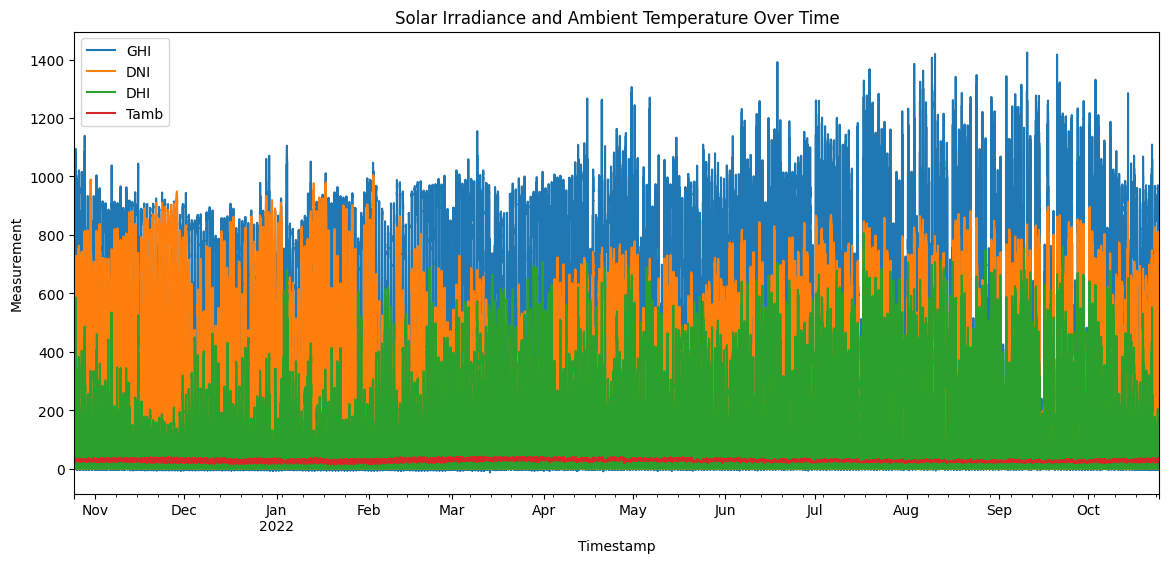

In [15]:

import matplotlib.pyplot as plt
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
# Plot solar irradiance over time
df_cleaned.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14, 6))
plt.title("Solar Irradiance and Ambient Temperature Over Time")
plt.ylabel("Measurement")
plt.show()

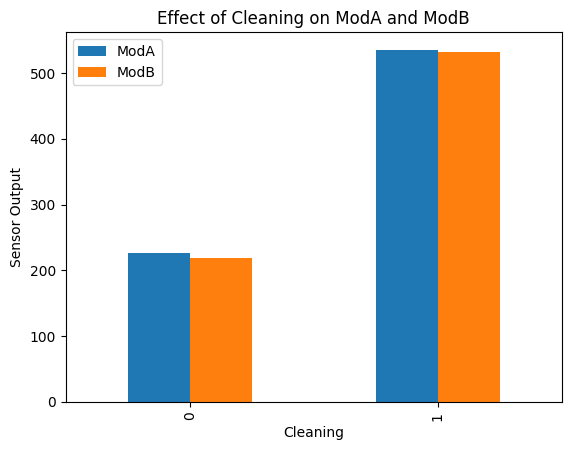

In [16]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Effect of Cleaning on ModA and ModB")
plt.ylabel("Sensor Output")
plt.show()

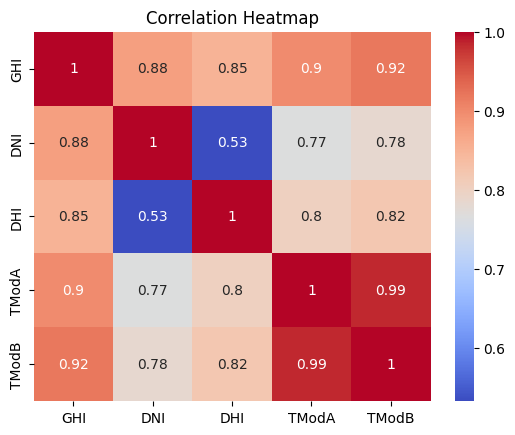

In [18]:
import seaborn as sns 
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

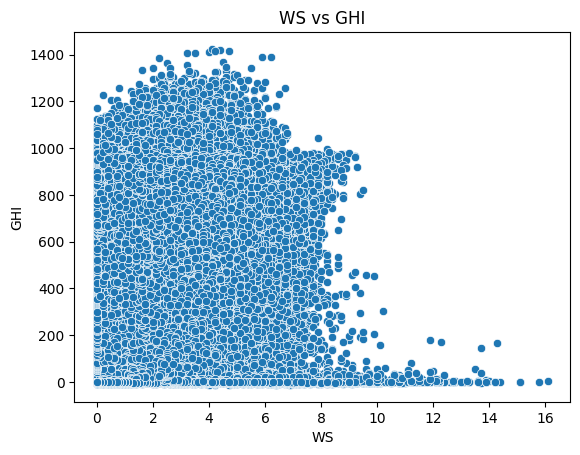

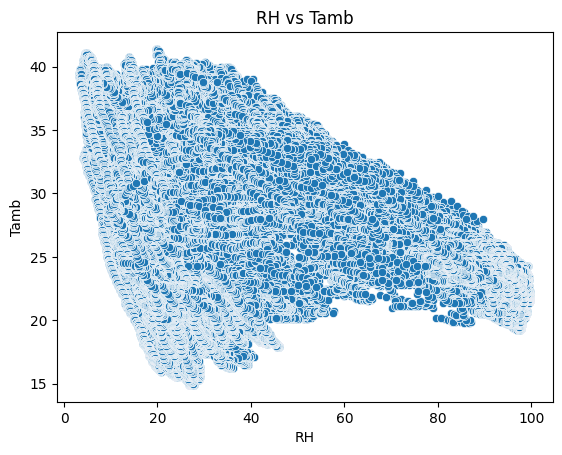

In [19]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
plt.title("RH vs Tamb")
plt.show()

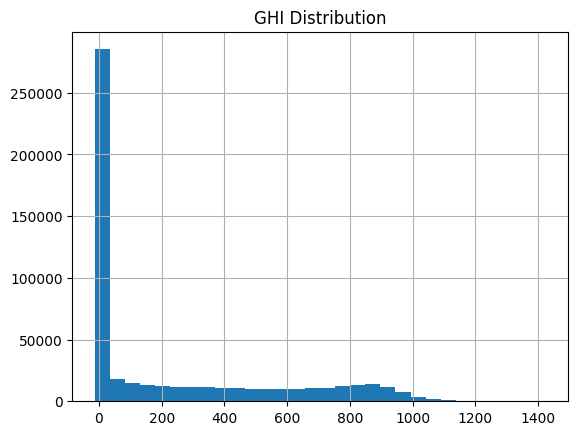

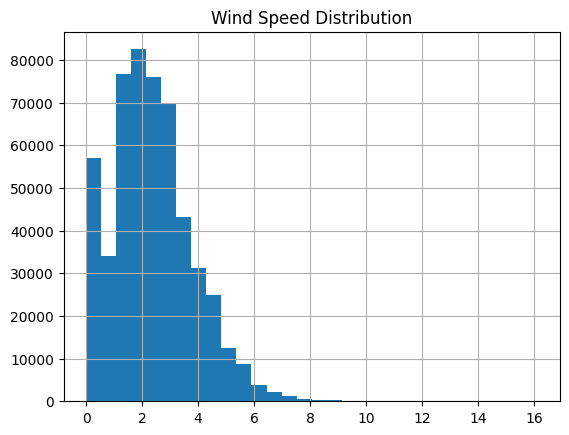

In [20]:
df_cleaned['GHI'].hist(bins=30)
plt.title("GHI Distribution")
plt.show()

df_cleaned['WS'].hist(bins=30)
plt.title("Wind Speed Distribution")
plt.show()

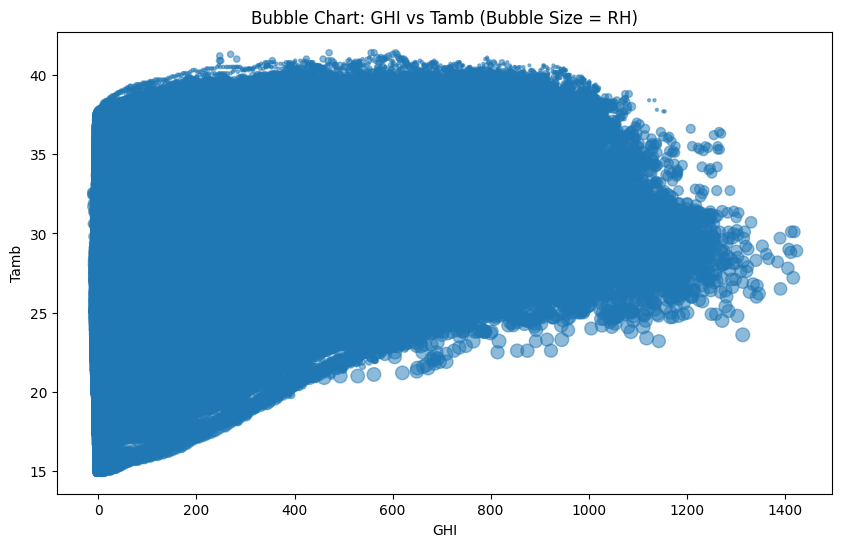

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], s=df_cleaned['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.show()